In [1]:

%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_excel('Real estate valuation data set.xlsx')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
dataset.drop(['No','X1 transaction date'],axis =1,inplace = True)


In [5]:
dataset.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
dataset.drop(['No','X1 transaction date'],axis =1,inplace = True)

In [7]:
dataset.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
dataset.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [9]:
dataset['X1'] = dataset['X2 house age']
dataset['X2'] = dataset['X3 distance to the nearest MRT station']
dataset['X3'] = dataset['X4 number of convenience stores']
dataset['X4'] = dataset['X5 latitude']
dataset['X5'] = dataset['X6 longitude']
dataset['Y'] = dataset['Y house price of unit area']

In [10]:
dataset.drop(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],axis = 1,inplace = True)

In [11]:
dataset.head()

,X1,X2,X3,X4,X5,Y
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
import numpy as np
dataset['y'] = np.where(dataset['Y'] >=40 , 1, 0)
dataset.head()

,X1,X2,X3,X4,X5,Y,y
0,32.0,84.87882,10,24.98298,121.54024,37.9,0
1,19.5,306.59470,9,24.98034,121.53951,42.2,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,1
3,13.3,561.98450,5,24.98746,121.54391,54.8,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,1


In [13]:
dataset['y'].value_counts()

0    223
1    191
Name: y, dtype: int64

In [14]:
dataset.drop(['Y'],axis = 1,inplace =True)

In [15]:
dataset.head()

,X1,X2,X3,X4,X5,y
0,32.0,84.87882,10,24.98298,121.54024,0
1,19.5,306.59470,9,24.98034,121.53951,1
2,13.3,561.98450,5,24.98746,121.54391,1
3,13.3,561.98450,5,24.98746,121.54391,1
4,5.0,390.56840,5,24.97937,121.54245,1


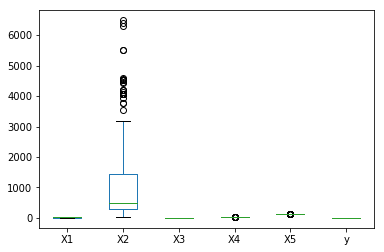

In [16]:
dataset.plot.box()

In [17]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

In [18]:
weights = np.random.uniform(size = (5,1))
bais = np.random.uniform(size = (1,1))

In [19]:
print('weights\n',weights,'\nbais\n',bais)

weights
 [[0.02609386]
 [0.65329312]
 [0.02392486]
 [0.22838737]
 [0.95024546]] 
bais
 [[0.17031392]]


In [20]:
print(x)

[[ 32.       84.87882  10.       24.98298 121.54024]
 [ 19.5     306.5947    9.       24.98034 121.53951]
 [ 13.3     561.9845    5.       24.98746 121.54391]
 ...
 [ 18.8     390.9696    7.       24.97923 121.53986]
 [  8.1     104.8101    5.       24.96674 121.54067]
 [  6.5      90.45606   9.       24.97433 121.5431 ]]


In [36]:
def activation_function(summation):
    return (1/(1+np.exp(-summation)))

In [44]:


thresh_old = 0.4
i = 2
while i<3:
    whole_answer = np.dot(x,weights)
    for k in whole_answer:
        k = k+bais[0,0]
        
        answer = 0
        if(k>=500):
            answer = 1
        else:
            answer = 0
            
        
    i = i+1


0
0
0
0
0
1
1
0
1
1
0
0
0
1
1
1
0
0
0
0
1
0
1
0
0
1
0
0
0
0
1
1
0
0
0
1
1
1
0
0
1
1
0
0
0
0
0
1
1
1
0
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
1
0
1
0
1
1
1
0
1
0
0
0
1
0
0
1
1
1
1
0
1
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
1
1
1
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
1
0
0
1
1
0
1
0
0
0
1
0
0
0
1
0
1
1
1
1
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
1
0
1
0
1
0
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
0
0
1
0
1
0
1
1
0
1
1
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
1
1
1
1
1
0
1
0
0
1
1
1
1
0
1
0
1
1
0
1
1
1
0
1
0
1
0
1
0
0
0
1
1
1
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
1
0
1
0
0
1
0
1
1
0
0
0
0
1
0
1
0
0
1
1
0
0
1
0
0
1
1
1
1
1
1
0
1
0
1
1
0
0
0
1
0
0
1
0
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
0
1
0
1
1
1
1
0
1
0
0
0
0
0
1
1
0
1
0
0
0
1
0
1
0
0
1
1
0
0
1
0
1
1
0
1
1
1
0
0
1
0
0
0
0
0
1
1
1
0
0
0
0


1.813250424657921e+77